In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import difflib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load dataset
data = pd.read_csv('power_consumption.csv')

In [2]:
# Display basic info
data.info()
print(data.head())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52583 entries, 0 to 52582
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   S no                          52583 non-null  int64  
 1   Temperature                   52263 non-null  object 
 2   Humidity                      52558 non-null  object 
 3   Wind Speed                    52512 non-null  object 
 4   general diffuse flows         52275 non-null  float64
 5   diffuse flows                 52568 non-null  float64
 6   Air Quality Index (PM)        52565 non-null  float64
 7   Cloudiness                    52583 non-null  int64  
 8    Power Consumption in A Zone  52583 non-null  float64
dtypes: float64(4), int64(2), object(3)
memory usage: 3.6+ MB
   S no Temperature Humidity Wind Speed  general diffuse flows  diffuse flows  \
0     1       6.559     73.8      0.083                  0.051          0.119   
1     2       6.414

In [3]:
# Feature selection (modify based on dataset columns)

data.columns = data.columns.str.strip()
target = "Power Consumption in A Zone"  # Modify based on actual column name
features = [col for col in data.columns if col != target]

X = data[features]
y = data[target]


In [4]:
# Train-test split
print(y.head())

print(target in data.columns)

target = target.strip()

if target in data.columns:
    y = data[target]
else:
    print("Column not found:", target)
print(features) 

    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



0    34055.69620
1    29814.68354
2    29128.10127
3    28228.86076
4    27335.69620
Name: Power Consumption in A Zone, dtype: float64
True
['S no', 'Temperature', 'Humidity', 'Wind Speed', 'general diffuse flows', 'diffuse flows', 'Air Quality Index (PM)', 'Cloudiness']


In [5]:
# Feature Scaling
print(X_train.dtypes)
print(X_train.applymap(lambda x: isinstance(x, str)).sum())

print(X_train[X_train.applymap(lambda x:isinstance(x, str))])

X_train = X_train.apply(pd.to_numeric, errors='coerce')
X_test = X_test.apply(pd.to_numeric, errors='coerce')

X_train = X_train.fillna(X_train.mean())
X_test = X_test.fillna(X_test.mean())

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



S no                        int64
Temperature                object
Humidity                   object
Wind Speed                 object
general diffuse flows     float64
diffuse flows             float64
Air Quality Index (PM)    float64
Cloudiness                  int64
dtype: object
S no                          0
Temperature               41814
Humidity                  42047
Wind Speed                42012
general diffuse flows         0
diffuse flows                 0
Air Quality Index (PM)        0
Cloudiness                    0
dtype: int64
       S no Temperature Humidity Wind Speed  general diffuse flows  \
25421   NaN       25.15    67.18      4.925                    NaN   
24106   NaN        22.3    69.75       0.07                    NaN   
16072   NaN       18.12     74.1      0.074                    NaN   
14948   NaN       17.13     77.2      0.073                    NaN   
19487   NaN       18.26     78.6      4.918                    NaN   
...     ...         ...  

C:\Users\spruha\AppData\Local\Temp\ipykernel_3224\2914458105.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  print(X_train.applymap(lambda x: isinstance(x, str)).sum())
C:\Users\spruha\AppData\Local\Temp\ipykernel_3224\2914458105.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  print(X_train[X_train.applymap(lambda x:isinstance(x, str))])


In [6]:
# Train Model (Random Forest as baseline)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)



RandomForestRegressor(random_state=42)

In [7]:
# Predictions
print(model)
print(X_test_scaled.shape)
y_pred = model.predict(X_test_scaled)



RandomForestRegressor(random_state=42)
(10517, 8)


In [11]:
# Evaluate Model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae}')
print(f'RMSE: {rmse}')
print(f'R^2 Score: {r2}')



MAE: 1313.5945557375933
RMSE: 2076.2551347956846
R^2 Score: 0.9332684821198736


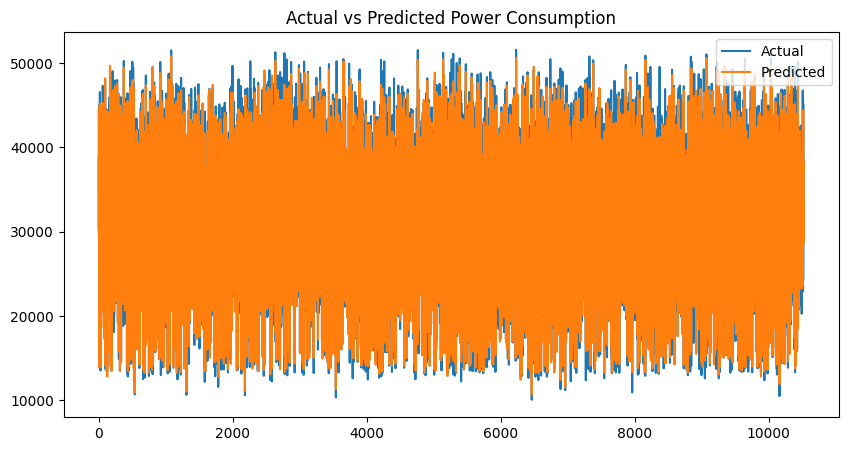

In [9]:
# Visualization
plt.figure(figsize=(10, 5))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.title('Actual vs Predicted Power Consumption')
plt.show()